# Exploratory notebook for model results

In [48]:
##Imports + read in files
from pipeline import find_best_model
import pandas as pd
import matplotlib.pyplot as plt

reg_df = pd.read_csv('results/reg-small-grid_all.csv')
clf_df = pd.read_csv('results/clf-small-grid_all.csv')

In [70]:
#Check for highest performing models at 16%
clf_16 = clf_df[(clf_df['threshold']==16) & (clf_df['split'] ==6) & (clf_df['classifier']=='SVM')]
clf_16.style.apply(
    find_best_model.highlight_max, color='darkorange', subset=['f1', 'accuracy',
                                                               'precision','recall','auc'])


,accuracy,auc,classifier,f1,parameters,precision,recall,split,threshold
1528,0.94985,0.927536,SVM,0.831234,{'C': 0.01},0.774648,0.896739,6,16
1531,0.94985,0.927536,SVM,0.831234,{'C': 0.1},0.774648,0.896739,6,16


In [24]:
#Create df with the max values for each model at threshold 16%, for each split
clf_max_df = clf_df[clf_df['threshold']==16].drop(['parameters'],axis=1)
clf_max_df['max_f1'] = clf_max_df.groupby(['classifier','split','threshold'])['f1'].transform('max')
clf_max_df['max_precision'] = clf_max_df.groupby(['classifier','split','threshold'])['precision'].transform('max')
clf_max_df['max_auc'] = clf_max_df.groupby(['classifier','split','threshold'])['auc'].transform('max')
clf_max_df['max_recall'] = clf_max_df.groupby(['classifier','split','threshold'])['recall'].transform('max')
clf_max_df['max_accuracy'] = clf_max_df.groupby(['classifier','split','threshold'])['accuracy'].transform('max')
clf_max_df.drop(['accuracy','auc','f1','precision','recall'],axis=1,inplace=True)
clf_max_df = clf_max_df.drop_duplicates()

Text(0, 0.5, 'Precision Value at 16%')

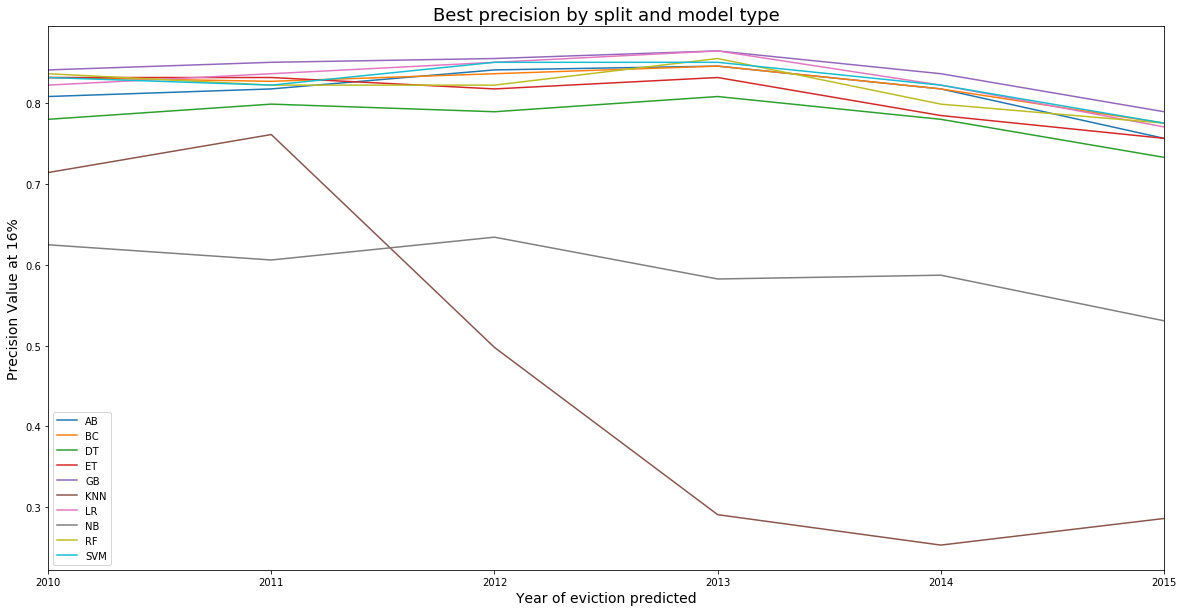

In [25]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)

for key, grp in clf_max_df.groupby(['classifier']):
    ax = grp.plot(ax=ax, kind='line', x='split', y='max_precision', label=key)

plt.Axes.set_xticklabels(ax, [2010, 2011, 2012, 2013, 2014, 2015])
plt.title('Best precision by split and model type',fontsize=18)
plt.xlabel('Year of eviction predicted',fontsize=14)
plt.ylabel('Precision Value at 16%',fontsize=14)

Text(0, 0.5, 'Precision Value at 16%')

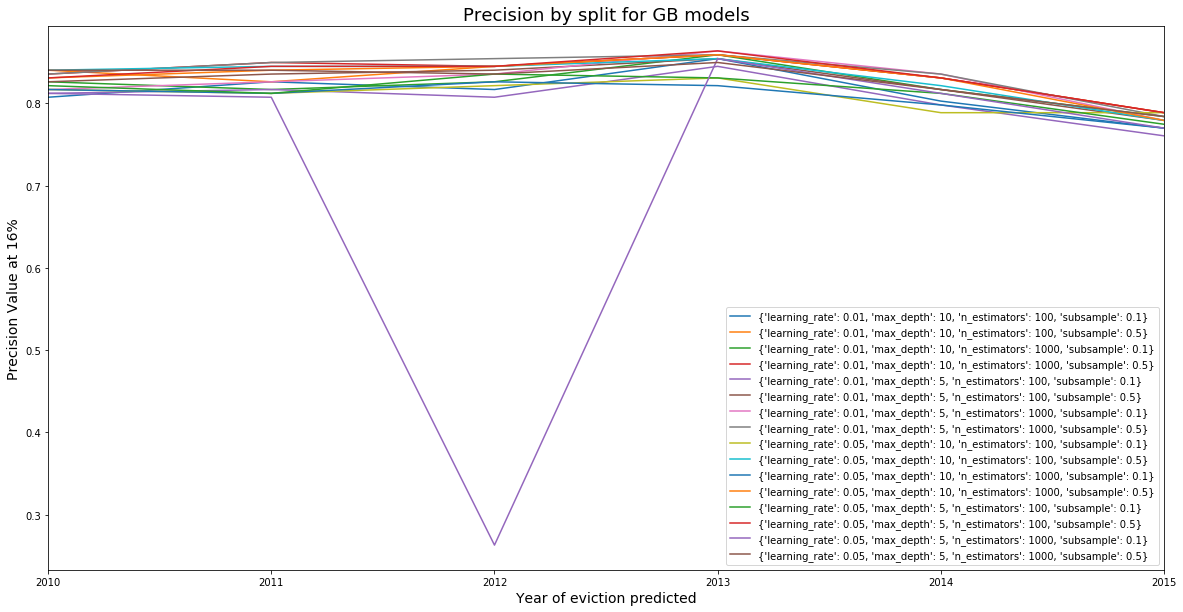

In [58]:
#Create df to look at highest performing model within gradient boosting 

clf_gb = clf_df[clf_df['classifier']=='GB']
clf_gb = clf_gb[clf_gb['threshold']==16]

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)

for key, grp in clf_gb.groupby(['parameters']):
    ax = grp.plot(ax=ax, kind='line', x='split', y='precision', label=key)

plt.Axes.set_xticklabels(ax, [2010, 2011, 2012, 2013, 2014, 2015])
plt.title('Precision by split for GB models',fontsize=18)
plt.xlabel('Year of eviction predicted',fontsize=14)
plt.ylabel('Precision Value at 16%',fontsize=14)

## Regression output analysis 

In [33]:
reg_16 = reg_df[reg_df['split']==6]
reg_16.style.apply(
    find_best_model.highlight_min, color='darkorange', subset=['root_mean_squared_error',
                                                              'mean_squared_error'])
#reg_16.style.apply(
    #find_best_model.highlight_max, color='darkorange', subset=['r2',
                                                         #     'explained_variance'])


,classifier,explained_variance,mean_squared_error,parameters,r2,root_mean_squared_error,split
165,LR,0.881666,8.91305,{},0.88165,2.98547,6
166,SVR,0.864466,10.6852,{'C': 0.01},0.85812,3.26882,6
167,SVR,0.787933,30.9547,{'C': 0.1},0.588975,5.56369,6
168,DTR,0.843379,11.8044,"{'max_depth': 5, 'max_features': None, 'min_samples_split': 2}",0.843258,3.43576,6
169,DTR,0.843379,11.8044,"{'max_depth': 5, 'max_features': None, 'min_samples_split': 5}",0.843258,3.43576,6
170,DTR,0.847714,11.4764,"{'max_depth': 5, 'max_features': None, 'min_samples_split': 10}",0.847613,3.38768,6
171,DTR,0.838517,12.1619,"{'max_depth': 50, 'max_features': None, 'min_samples_split': 2}",0.838511,3.48739,6
172,DTR,0.818478,13.6733,"{'max_depth': 50, 'max_features': None, 'min_samples_split': 5}",0.818443,3.69774,6
173,DTR,0.83607,12.349,"{'max_depth': 50, 'max_features': None, 'min_samples_split': 10}",0.836027,3.51411,6
174,RFR,0.772432,17.2374,"{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}",0.771118,4.15179,6


In [28]:
#Create df with the max values for each model for each split
reg_max_df = reg_df.drop(['parameters'],axis=1)
reg_max_df['max_r2'] = reg_max_df.groupby(['classifier','split'])['r2'].transform('max')
reg_max_df['max_explained_var'] = reg_max_df.groupby(['classifier','split'])['explained_variance'].transform('max')
reg_max_df['min_rmse'] = reg_max_df.groupby(['classifier','split'])['root_mean_squared_error'].transform('min')
reg_max_df['min_mean_squared_error'] = reg_max_df.groupby(['classifier','split'])['mean_squared_error'].transform('min')
reg_max_df.drop(['explained_variance','r2','mean_squared_error','root_mean_squared_error'],axis=1,inplace=True)
reg_max_df = reg_max_df.drop_duplicates()

Text(0, 0.5, 'RMSE')

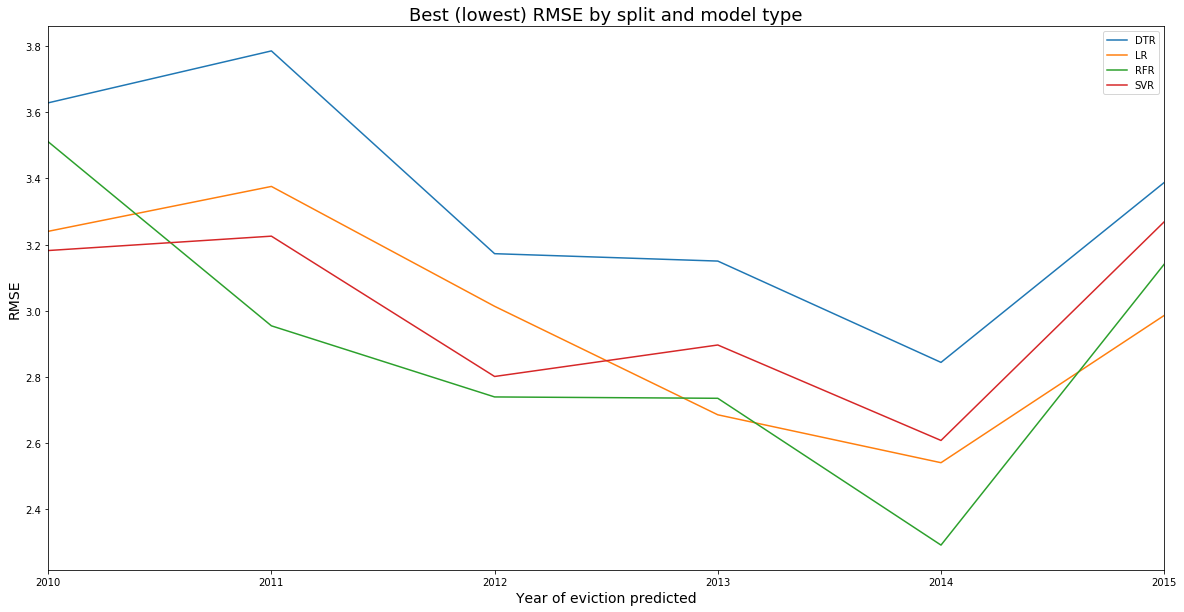

In [29]:
#Plot best RMSE over time for each model
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)

for key, grp in reg_max_df.groupby(['classifier']):
    ax = grp.plot(ax=ax, kind='line', x='split', y='min_rmse', label=key)

plt.Axes.set_xticklabels(ax, [2010, 2011, 2012, 2013, 2014, 2015])
plt.title('Best (lowest) RMSE by split and model type',fontsize=18)
plt.xlabel('Year of eviction predicted',fontsize=14)
plt.ylabel('RMSE',fontsize=14)